In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Define functions to get stationary distribution and generate plots

#takes in an mxm transition matrix, an mx1 state vector, and number n of steps to take (optional)
#returns mx1 stationary distribution approximation, mxn matrix of probabilities at each step taken
def get_stationary_distribution(transition_matrix, initial_state, steps = 100):
    
    #Initialize state vector to initial state, matrix to keep track of state vectors
    current_state = initial_state
    state_list = []

    for s in range(steps):
        #Equivalent to multiplying transition matrix by itself n times, then initial_state
        current_state = transition_matrix @ current_state
        #Normalize product with 1-norm (to account for floating point error):
        current_state *= 1.0 / np.linalg.norm(current_state, ord = 1)
        state_list.append(current_state)
    state_list = np.array(state_list).T
    stationary_dist = current_state
    return stationary_dist, state_list

#takes in an mxn matrix of probabilities at n different steps and an mx1 list of titles for each line, 
    #and whether to put plots on one graph or multiple (optional)
def generate_plots(state_list, titles, single_plot = True):
    
    m, n = state_list.shape
    # Use n linearly spaced points for iterations, get rows of state_list for probabilities
    x = np.linspace(0, n, n)
    Y = []
    #Get probabilities of each page from rows of state_list
    for i in range(m):
        Y.append(state_list[i])
        
    if single_plot:
        # Generate single plot: 
        f, ax = plt.subplots(1, figsize = (8, 6))
        f.suptitle('P(page | colorado.edu) from 1 to {} Iterations'.format(n))
        for i in range(m):
            ax.plot(x, Y[i], label = titles[i])
            
        ax.set(xlabel='Iteration', ylabel='Probability')
        ax.legend()
        plt.show()
    else:
        # Generate plots:
        f, axarr = plt.subplots(m, figsize = (8, 10))
        f.suptitle('P (page | colorado.edu) from 1 to {} Iterations'.format(n))
        for i in range(m):
            axarr[i].plot(x, Y[i])
            axarr[i].set_title(titles[i])
        for ax in axarr.flat:
            ax.set(xlabel='Iteration', ylabel='Probability')
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axarr.flat:
            ax.label_outer()
        plt.show()


In [94]:
test = np.array([[0.7, 0.6], [0.3, 0.4]])
state = np.array([1, 0])
s, states = get_stationary_distribution(test, state, 5)

Approximate Stationary Distribution: [0.36363636 0.27272727 0.27272727 0.09090909]
[0.31818182 0.31818182 0.25757576 0.18181818]


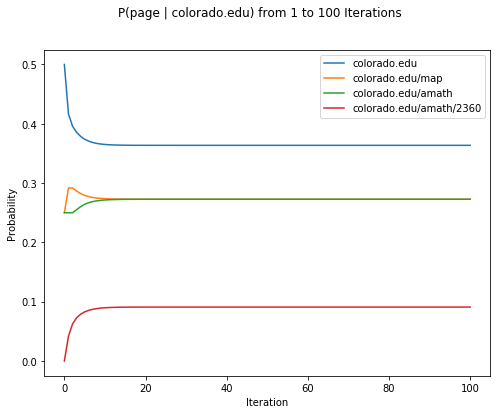

In [39]:
# 3.1 Questions
#1
#Define transition matrix, initial state vector (initial state colorado.edu)
webpage_matrix = np.array([ [0.5, 0.25, 0.25, 0.0], 
                                [0.5, 0.5, 0.0, 0.0], 
                                [0.5 / 3.0, 0.5 / 3.0, 0.5, 0.5 / 3.0], 
                                [0.0, 0.0, 0.5, 0.5] ]).T

state_1 = np.array([1, 0, 0, 0])
stationary_dist_1, state_list_1 = get_stationary_distribution(webpage_matrix, state_1)
print("Approximate Stationary Distribution: {}".format(stationary_dist_1))
titles_1 = ["colorado.edu", "colorado.edu/map", "colorado.edu/amath", "colorado.edu/amath/2360"]
generate_plots(state_list_1, titles_1)

Approximate Stationary Distribution: [1.87392237e-03 1.39523147e-03 1.19625201e-03 4.16519088e-04
 9.95118075e-01]


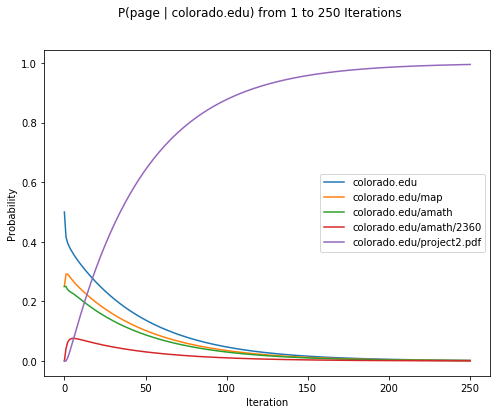

In [78]:
#4
webpage_matrix_2 = np.array([ [0.5, 0.25, 0.25, 0.0, 0.0], 
                                [0.5, 0.5, 0.0, 0.0, 0.0], 
                                [0.5 / 3.0, 0.5 / 3.0, 0.5, 0.5 / 3.0, 0.0], 
                                [0.0, 0.0, 0.25, 0.5, 0.25],
                                [0.0, 0.0, 0.0, 0.0, 1.0] ]).T
state_2 = np.array([1, 0, 0, 0, 0])
stationary_dist_2, state_list_2 = get_stationary_distribution(webpage_matrix_2, state_2, 250)
print("Approximate Stationary Distribution: {}".format(stationary_dist_2))

titles_2 = ["colorado.edu", 
            "colorado.edu/map", 
            "colorado.edu/amath", 
            "colorado.edu/amath/2360", 
            "colorado.edu/project2.pdf"]
generate_plots(state_list_2, titles_2)

In [122]:
#5 - find analytical soln, compare against computed, plot abs error on semilogy plot
#analytic stationary vector equal to some eigenvector with eigenvalue 1 (some vector in null(A - I))

# takes in mxn list of approximate stationary distributions and the mx1 true stationary distribution
# returns nx1 list of absolute errors
def get_abs_error(approx, true):
    
    #initialize list for errors:
    m, n = approx.shape
    error_list = np.zeros(n)
    approx = approx.T # transpose to access columns
    
    # loop over columns of approx to get approximate stationary dist at each step
    for j in range(n):
        # defining absolute error as 1-norm of the vector approximation - true
        error_list[j] = np.linalg.norm(approx[:][j] - true, ord = 1)
    return error_list
        
# takes in mxn list of error vectors
def plot_error(error_list):
    
    n = len(error_list)
    x = np.linspace(0, n, n)

    f, ax = plt.subplots(1, figsize = (8, 6))
    f.suptitle('Absolute Error of Stationary Distribution Approximations from 1 to {} Iterations'.format(n))
    
    ax.semilogy(x, error_list)

    ax.set(xlabel='Iteration', ylabel='Log of Absolute Error')
    plt.show()


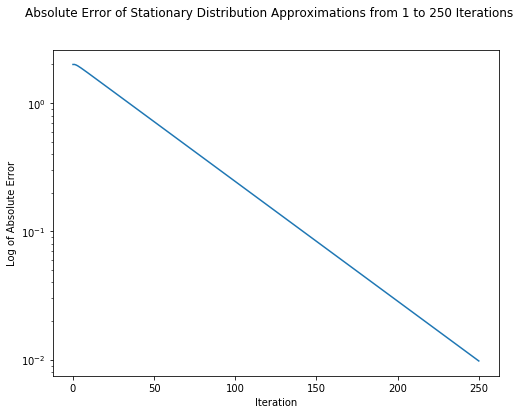

In [123]:
#Calculate and plot errors in stationary dist. approx. for webpage_matrix_2:
true_dist = np.array([0,0,0,0,1])
error_list = get_abs_error(state_list_2, true_dist)
plot_error(error_list)